The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Basic interact

At the most basic level, interact autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore. Here is a function that returns its only argument x.

In [8]:
def f(x):
    return x
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [9]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

f you pass a string, interact will generate a text box.

In [11]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interact can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, interact also works with functions that have multiple arguments.

In [12]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

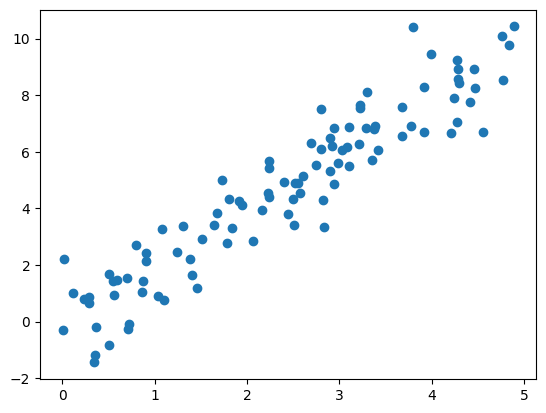

In [ ]:
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2*x + ep
plt.scatter(x, y);

In [ ]:
x_values = np.linspace(0, 5, 1000)

In [ ]:
def slope_viz(m=1):
    plt.scatter(x, y)
    plt.plot(x_values, m*x_values, lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);

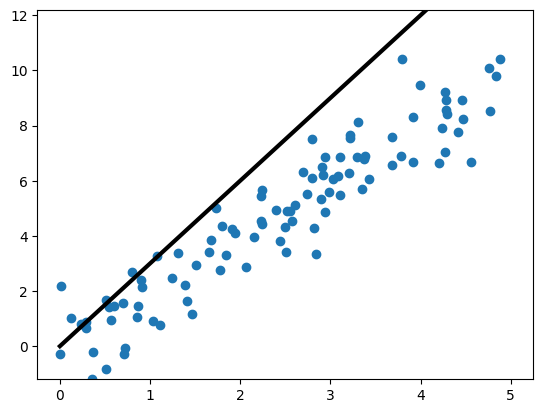

In [ ]:
slope_viz(m=3)

In [ ]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2));

NameError: ignored

Dropdown List

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

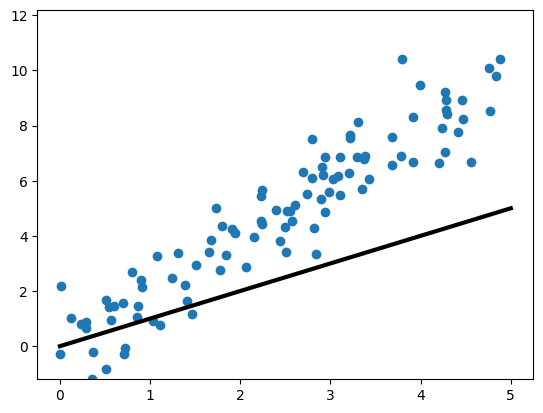

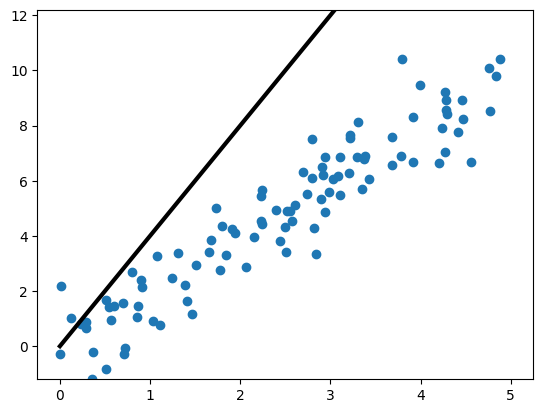

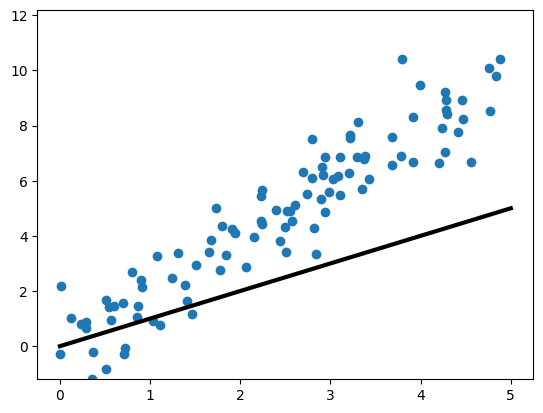

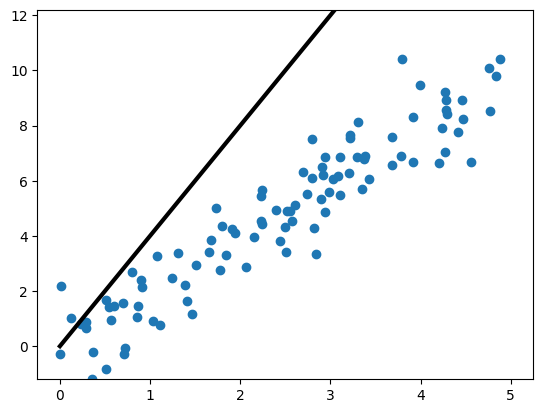

In [ ]:
widgets.interact(slope_viz, m=[0, 1, 2, 3, 4]);

# Check Box and Text

In [ ]:
def slope_viz_update(m=1, line=False, text=""):
    plt.scatter(x, y)
    
    if line:
        plt.plot(x_values, m*x_values, lw=5, color='black')
        
    if text:
        plt.text(0, 10, f"{text}\nThe slope is {m}.")
    
    plt.ylim(-1.2, 12.2);

In [ ]:
widgets.interact(slope_viz_update, m=[0, 1, 2, 3, 4], line=False, text="");

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Checkbox(value=Fal…

# Custom Widgets

In [ ]:
widgets.interact(slope_viz, m=[0, 1, 2, 3, 4]);

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

In [ ]:
radio_buttons = widgets.RadioButtons(
    options=[0, 1, 2, 3, 4],
    value=2, 
    description='Slope: '
)

interactive(children=(RadioButtons(description='Slope: ', index=2, options=(0, 1, 2, 3, 4), value=2), Output()…

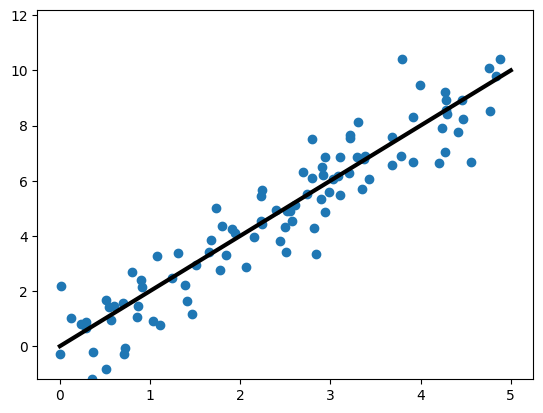

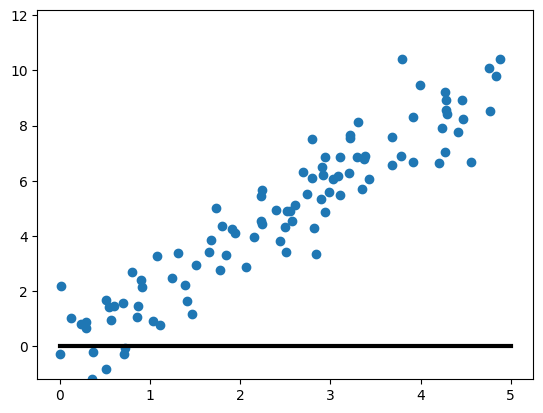

In [ ]:
widgets.interact(slope_viz, m=radio_buttons);

# Fixing arguments using fixed

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the fixed function.

In [ ]:
def h(p, q):
    return (p, q)

When we call interact, we pass fixed(20) for q to hold it fixed at a value of 20.

In [ ]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

# What are widgets?

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

What can they be used for?

You can use widgets to build interactive GUIs for your notebooks.
You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.

Using widgets

import ipywidgets as widgets

# repr

# Widgets have their own display repr which allows them to be displayed using IPython's display framework. Constructing and returning an IntSlider automatically displays the widget . Widgets are displayed inside the output area below the code cell. Clearing cell output will also remove the widget.

In [ ]:
widgets.IntSlider()

IntSlider(value=0)

# display()

You can also explicitly display the widget using display(...).

In [ ]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

Multiple display() calls


# If you display the same widget twice, the displayed instances in the front-end will remain in sync with each other.



In [ ]:
display(w)

IntSlider(value=1)

Why does displaying the same widget twice work?

# Widgets are represented in the back-end by a single object. Each time a widget is displayed, a new representation of that same object is created in the front-end. These representations are called views.

You can close a widget by calling its close() method.

In [ ]:
display(w)

IntSlider(value=100)

In [ ]:
w.close()

# Widget properties

In [ ]:
w = widgets.IntSlider()
display(w)
w.value

IntSlider(value=0)

0

In [ ]:
w.value = 100

In [ ]:
w.value

100

# Shorthand for setting the initial values of widget properties

# While creating a widget, you can set some or all of the initial values of that widget by defining them as keyword arguments in the widget's constructor

In [ ]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

In [ ]:
widgets.Text(value='Hello World!', disabled=False)

Text(value='Hello World!')

# Linking two similar widgets

In [ ]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

# Unlinking widgets

In [ ]:
mylink.unlink()

# Widget Events

In [ ]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

# Widget List

# Numeric widgets

There are many widgets distributed with ipywidgets that are designed to display numeric values. Widgets exist for displaying integers and floats, both bounded and unbounded. The integer widgets share a similar naming scheme to their floating point counterparts. By replacing Float with Int in the widget name, you can find the Integer equivalent.

# IntSlider
The slider is displayed with a specified, initial value.

Lower and upper bounds are defined by min and max, and the value can be incremented according to the step parameter.

The slider's label is defined by description parameter

The slider's orientation is either 'horizontal' (default) or 'vertical'

readout displays the current value of the slider next to it. The options are True (default) or False

readout_format specifies the format function used to represent slider value. The default is '.2f'

In [ ]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [ ]:
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

FloatSlider

In [ ]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

In [ ]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

# FloatLogSlider

In [ ]:
widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

# IntRangeSlider

In [ ]:
widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)


IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

# FloatRangeSlider

In [ ]:
widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(5.0, 7.5), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

IntProgress

In [ ]:
widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'maroon'},
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10, style=ProgressStyle(bar_color='maroon'))

# FloatProgress

In [ ]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    description='Loading:',
    bar_style='info',
    style={'bar_color': '#ffff00'},
    orientation='horizontal'
)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0, style=ProgressStyle(bar_color='#f…

# BoundedIntText

In [ ]:
widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)

BoundedIntText(value=7, description='Text:', max=10)

# BoundedFloatText

In [ ]:
widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

# IntText

In [ ]:
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)

IntText(value=7, description='Any:')

# FloatText

# Boolean widgets

There are three widgets that are designed to display a boolean value.

# ToggleButton

In [ ]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description'
    #icon='check'
)

ToggleButton(value=False, description='Click me', tooltip='Description')

In [ ]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

Checkbox

value specifies the value of the checkbox

indent parameter places an indented checkbox, aligned with other controls. Options are True (default) or False

In [ ]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)

Valid
The valid widget provides a read-only indicator.

In [ ]:
widgets.Valid(
    value=False,
    description='Valid!',
)

Valid(value=False, description='Valid!')

Selection widgets

There are several widgets that can be used to display single selection lists, and two that can be used to select multiple 

values. All inherit from the same base class. You can specify the enumeration of selectable options by passing a list (options

are either (label, value) pairs, or simply values for which the labels are derived by calling str).


In [ ]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [ ]:
widgets.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    value=2,
    description='Number:',
)

Dropdown(description='Number:', index=1, options=(('One', 1), ('Two', 2), ('Three', 3)), value=2)

# RadioButtons

In [ ]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')

With dynamic layout and very long labels

In [ ]:
widgets.Box(
    [
        widgets.Label(value='Pizza topping with a very long label:'), 
        widgets.RadioButtons(
            options=[
                'pepperoni', 
                'pineapple', 
                'anchovies', 
                'and the long name that will fit fine and the long name that will fit fine and the long name that will fit fine '
            ],
            layout={'width': 'max-content'}
        )
    ]
)

Box(children=(Label(value='Pizza topping with a very long label:'), RadioButtons(layout=Layout(width='max-cont…

# Select

In [ ]:
widgets.Select(
    options=['Linux', 'Windows', 'macOS'],
    value='macOS',
     #rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'macOS'), value='macOS')

# SelectionSlider

In [ ]:
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

# SelectionRangeSlider

The value, index, and label keys are 2-tuples of the min and max values selected. The options must be nonempty.

In [ ]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

ToggleButtons

In [ ]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

NameError: ignored

SelectMultiple

Multiple values can be selected with shift and/or ctrl (or command) pressed and mouse clicks or arrow keys.

In [ ]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

# String widgets

Text

In [ ]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False   
)

Text(value='Hello World', description='String:', placeholder='Type something')

Textarea

In [ ]:
widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

# Combobox

In [ ]:
widgets.Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

Combobox(value='', description='Combobox:', ensure_option=True, options=('Paul', 'John', 'George', 'Ringo'), p…

# Password

# The Password widget hides user input on the screen. This widget is not a secure way to collect sensitive information because:

The contents of the Password widget are transmitted unencrypted.

If the widget state is saved in the notebook the contents of the Password widget is stored as plain text.

In [ ]:
widgets.Password(
    value='password',
    placeholder='Enter password',
    description='Password:',
    disabled=False
)

Password(description='Password:', placeholder='Enter password')

HTML

In [ ]:
widgets.HTML(
    value="Hello <b>World</b>",
    placeholder='Some HTML',
    description='Some HTML',
)

NameError: ignored

HTML Math

In [ ]:
widgets.HTMLMath(
    value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
    placeholder='Some HTML',
    description='Some HTML',
)

NameError: ignored

Button

In [ ]:
button = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

In [ ]:
play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

NameError: ignored

# Color picker

In [ ]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

NameError: ignored